# Regularization

In [1]:
import numpy as np
import json
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib import patheffects
from matplotlib.patches import Polygon
import seaborn as sns

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error


sns.set_context("talk", font_scale=1.5, rc={"lines.linewidth": 2.5})

In [2]:
# Import company colors
with open('plot_colors_nf.json', 'r') as pc:
    color_dict = json.load(pc)

c_light, c_dark, c_blue, c_green= color_dict['color_light'], color_dict['color_dark'], color_dict['color_blue'],color_dict['color_green']

# Define color map for plotting
color_map = ListedColormap([c_blue, c_light, c_dark, c_green])

In [3]:
# our data
def generate_data(n=20, m=10):
    np.random.seed(42)
    X = 3 * np.random.rand(n, 1)
    y = 1 + 0.5 * X + np.random.randn(n, 1) / 1.5
    # generating test data, from same DGP (data generating process)
    np.random.seed(31)
    X_test = 3 * np.random.rand(m, 1)
    y_test = 1 + 0.5 * X_test + np.random.randn(m, 1) / 1.5

    return X, y, X_test, y_test

X, y, X_test, y_test = generate_data()

In [4]:
def plot_data(data="train", ax=None, title=None, figsize=(10,8)):
    if ax is None:
        fig, ax = plt.subplots(figsize=figsize)
    
    if data == "train":
        ax.plot(X, y, ".",ms =25, color=c_light, alpha = 0.8 )
    elif data == "test":
        ax.plot(X_test, y_test, ".",ms =25, color=c_blue, alpha = 0.8 )
    elif data == "both":
        ax.plot(X, y, ".",ms =25, color=c_light, alpha = 0.8 )
        ax.plot(X_test, y_test, ".",ms =25, color=c_blue, alpha = 0.8 )
    if title:
        ax.set_title(title, size=20)
    ax.set_xlabel("$x_1$")
    ax.set_ylabel("$y$  ", rotation=0)
    ax.axis([0, 3, 0, 3.5])
    sns.despine()
    sns.set_context("talk", font_scale=1.5, rc={"lines.linewidth": 2.5})

def format_float(num):
    """Function to change float formatting from scientific style (1e-2) to normal formal (0.01), without displaying trailing 0s 

    Args:
        num (float): number to change to standard notation

    Returns:
        float: returns same number, but not in scientific style
    """
    return np.format_float_positional(num, trim='-')

def perform_model(model_class, X,y, alpha,polynomial,model_kwargs):
    if alpha > 0:
            model = model_class(alpha,random_state=42, **model_kwargs)
    else:
        model = LinearRegression()
    if polynomial:
        model = make_pipeline(
                PolynomialFeatures(degree=10, include_bias=False),
                StandardScaler(),
                model)
    model.fit(X, y)
    y_predict = model.predict(np.linspace(0, 3, 100).reshape(100, 1))

    return y_predict



def get_mse(model_class, X,y, alpha, polynomial):
    """return the mean squared error for any type of regularization you want to apply, and with any alpha
    
    Args:
        model_class (sklearn model class): ex. Ridge or Lasso
        polynomial (bool): =True or False, if polynomia=True polynomial degree of 10
        alpha: value for regularization paramether
    """
    
    if alpha > 0:
            model = model_class(alpha,random_state=42)
    else:
        model = LinearRegression()
    if polynomial:
        model = make_pipeline(
                PolynomialFeatures(degree=10, include_bias=False),
                StandardScaler(),
                model)
    model.fit(X, y)
    y_predict = model.predict(X)#np.linspace(0, 3, 100).reshape(100, 1))
    
    return mean_squared_error(y, y_predict)



def plot_model_type(model_class, polynomial, alphas,ax=None,title=None, legend=None, data="train",model_kwargs={}, ):
    """Plots three lines of model class (Ridge, Lasso, LinearRegression etc.) stated with different alpha values

    Args:
        model_class (sklearn model class): use the sklearn name of a model class (for example LinearRegression)
        polynomial (bool): false is a linear regression, true polynomial regression degree 10
        alphas (list): list of integers for regularization parameter alpha
    """ 
    if ax is None:
        fig, ax = plt.subplots(figsize=figsize)
    plot_data(ax=ax, data=data )
    for alpha, style, color in zip(alphas, (":", "--", "-"), (c_blue, c_dark, c_green)):       
        y_predict = perform_model(model_class, X,y, alpha,polynomial,model_kwargs)
        
        ax.plot(np.linspace(0, 3, 100).reshape(100, 1), y_predict, style,color=color,  linewidth=4,
                 label=fr"$\alpha = {format_float(alpha)}$")

    if title:
        ax.set_title(title, size=20)
    if legend:
        ax.legend(legend,loc="upper left")
    else:
        ax.legend(loc="upper left",fontsize= 18)


def plot_models(model_classes, polynomials, alphas,markers=(":", "--", "-"),colors=(c_blue, c_dark, c_green),ax=None, title=None, legend=None, data="train",model_kwargs={}):
    """similar function as plot_models just with more flexibility in plotting ( you can add parameters like markers and colors etc.) 
    esp if you dont want to plt 3 lines

    Args:
        model_class (sklearn model class): use the sklearn name of a model class (for example LinearRegression)
        polynomial (list, bool): for each line define: false is a linear regression, true polynomial regression degree 10
        alphas (list): list of integers for regularization parameter alpha
        markers (tuple, with marker  strings): markers for line plots. Defaults to (":", "--", "-").
        colors (tuple, strings): hex of colors. Defaults to nf colors ('#191970', '#bac2ca', "#ff4a11").
    """
    if ax is None:
        fig, ax = plt.subplots(figsize=figsize)
    
    plot_data(ax=ax,data=data )

    for model_class, polynomial, alpha, style, color in zip(model_classes, polynomials,alphas, markers, colors):
        
        y_predict = perform_model(model_class, X,y, alpha,polynomial, model_kwargs)
        ax.plot(np.linspace(0, 3, 100).reshape(100, 1), y_predict, style,color=  color,  linewidth=4,
                 label=fr"$\alpha = {format_float(alpha)}$")
    if title:
        ax.set_title(title, size=20)
    if legend:
        ax.legend(legend,loc="upper left",fontsize= 18)
    else:
        ax.legend(loc="upper left",fontsize= 18)

<div class="slide-title"> 
    
# Regularization
    
</div> 

## Part 1
## Recap on Bias-Variance Trade-Off

### Bias - Variance Trade-Off

$$MSE(\hat{y})=Bias^{2}+Variance+Noise$$

→ to minimize the cost we need to find a good balance between the Bias and Variance term of a model  
→ we can influence bias and variance by changing the complexity of our model 

<div class="alert alert-block alert-info">
<b>Note: </b> 
    Noise is the irreducible error of a model.  
    We cannot influence it.
</div>  


Notes: Q: What is bias /variance Q: What is overfitting and underfitting Q: How to prevent overfitting → clear to everyone that regularization is used to prevent overfitting

### Example: Underfitting vs. Overfitting

- We got data.
    But we don’t know the underlying Data Generating Process.
- So we want to model it.
- Do you see a pattern/trend?

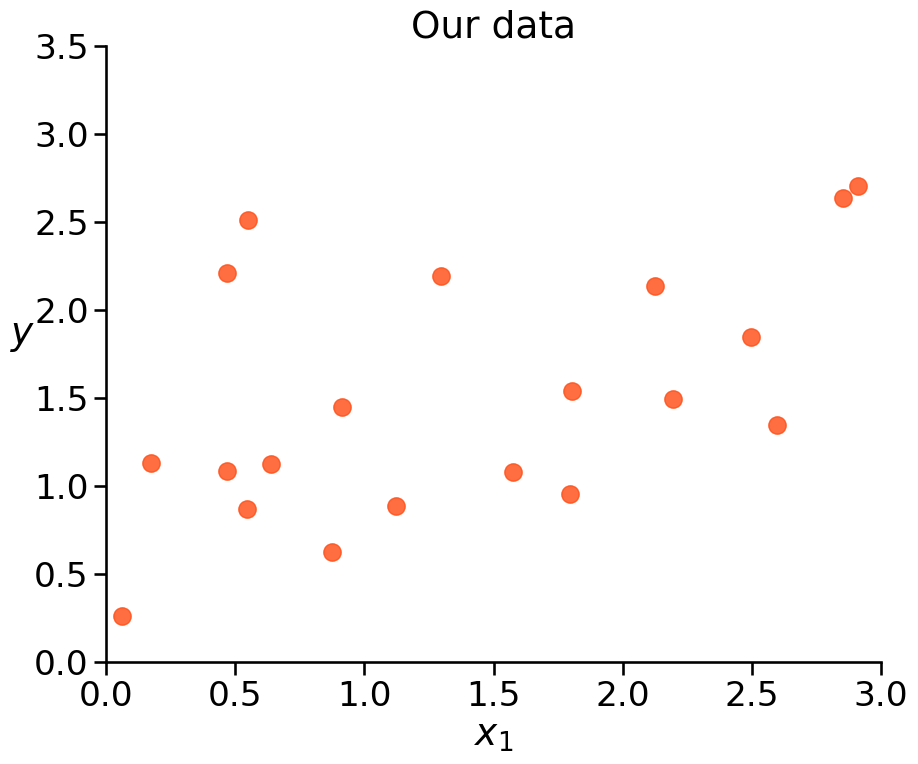

In [5]:
plot_data(title="Our data", figsize=(10, 8))

Notes: We got some data… noone knows the underlying process… (btw the underlying process is actually a positive linear relationship)

### Example: Underfitting vs. Overfitting
   
- Which model seems best?
- Which model seems to underfit the data?
- Which model might overfit the data?
- How to evaluate if a model is underfitting/overfitting?

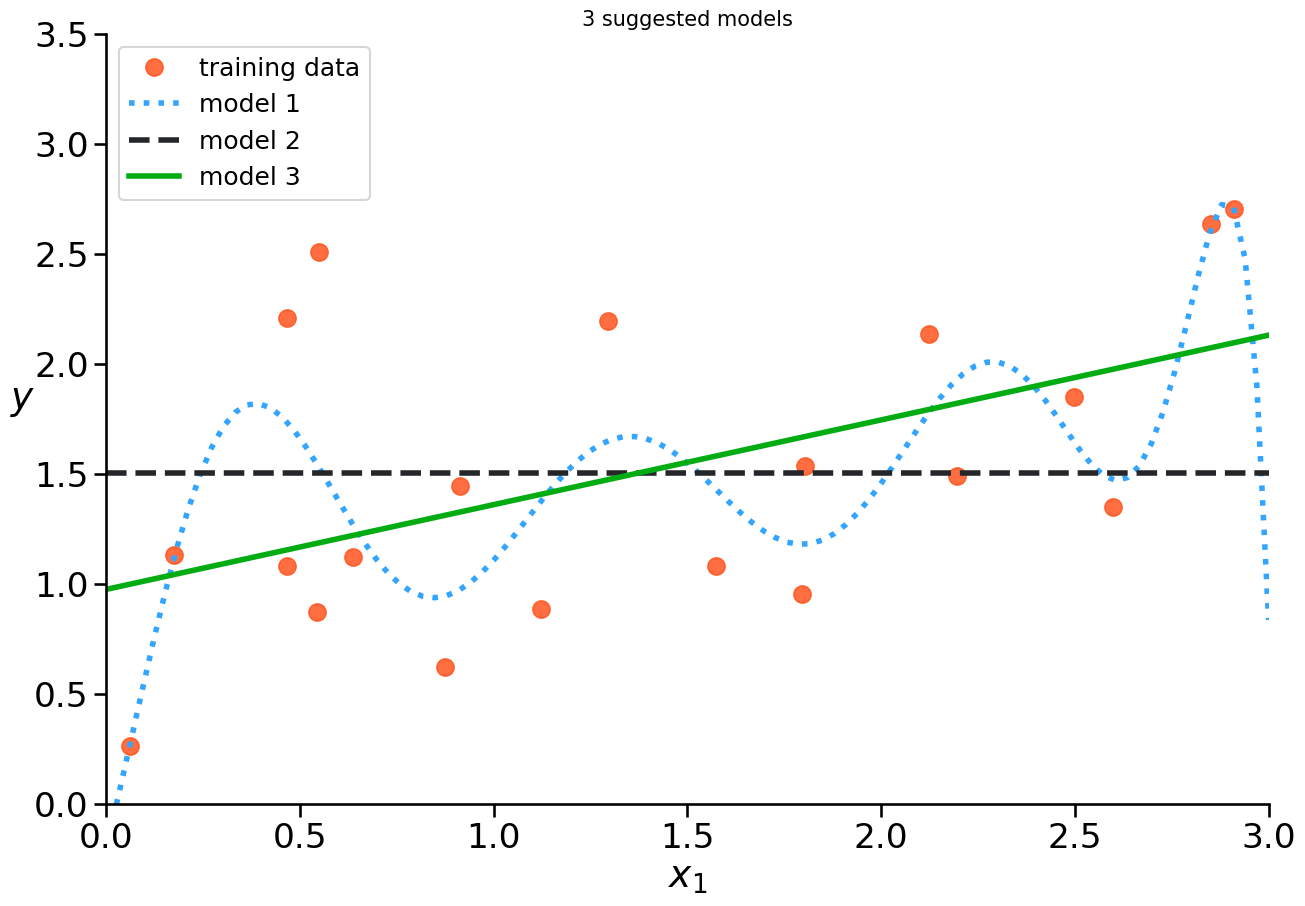

In [6]:
plot_models([Lasso, Lasso, Lasso], polynomials=[True,True,False], alphas=(0, 1, 0), figsize=(10, 8), title="3 suggested models", legend=[ "training data","model 1", "model 2", "model 3"])


Notes: best model might be the orange one, but we wouldn’t know… as we don’t know the DGP. every model could be best grey might be underfitting: actually its saying x1 has no effect on y. so for any x value it would predict the mean of y → it might not get the the underlying pattern at all blue might be overfitting. It is clear to see that the line is chasing each point esp the extreme ones. also it might look totally different if trained on different data → it might not generalize well on unseen data to evaluate

you need a COST function and TEST data.
and do error analysis

### Example: Underfitting vs. Overfitting

How to evaluate if a model is underfitting/overfitting?
- we need a cost function
- we need test data
- we should do error analysis


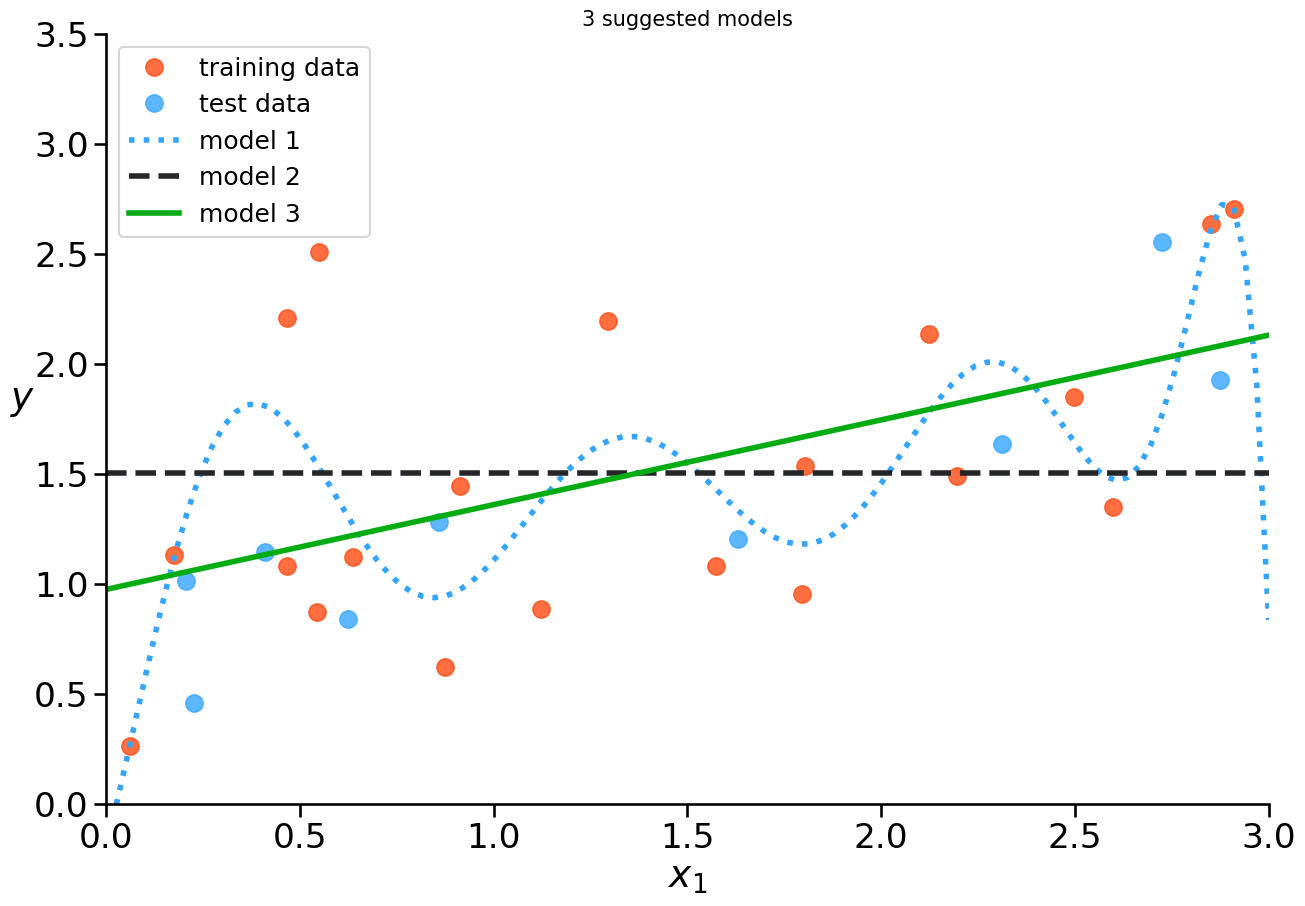

In [7]:
plot_models([Lasso, Lasso, Lasso], polynomials=[True,True,False], alphas=(0, 1, 0),data="both", title="3 suggested models", legend=[ "training data","test data","model 1", "model 2", "model 3"])


Notes: with the blue dots (test data) we can see how good our model performs on unseen data

### Example: Underfitting vs. Overfitting

How to figure out if your model is overfitting?  


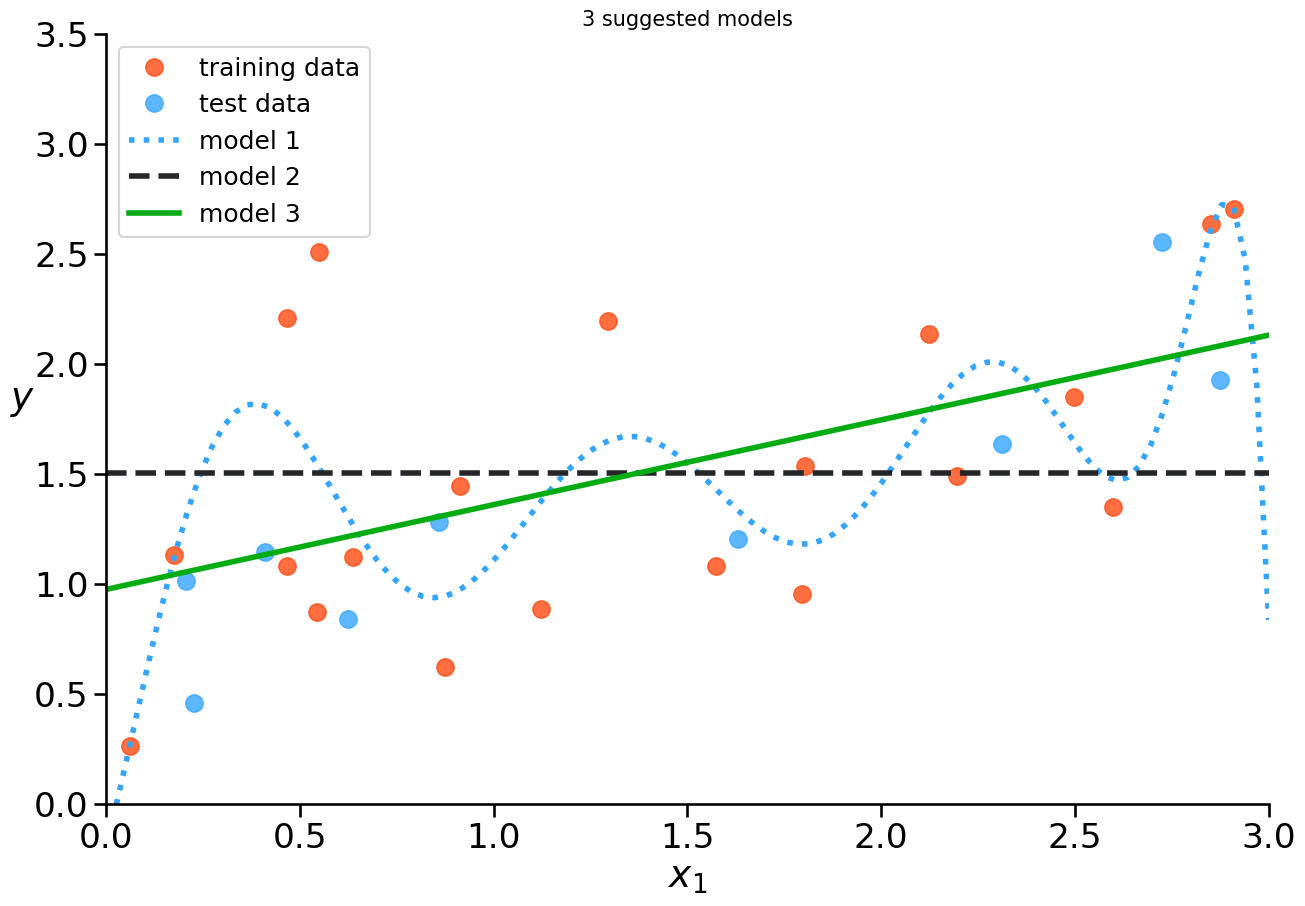

In [8]:
plot_models([Lasso, Lasso, Lasso], polynomials=[True,True,False], alphas=(0, 1, 0),data="both", title="3 suggested models", legend=[ "training data","test data","model 1", "model 2", "model 3"])


Notes: low error on training data, high error on test data

### Example: Underfitting vs. Overfitting

How to figure out if your model is overfitting?
 - error on training data is low  
 - error on test data is high    

→ model memorizes the noise in the data

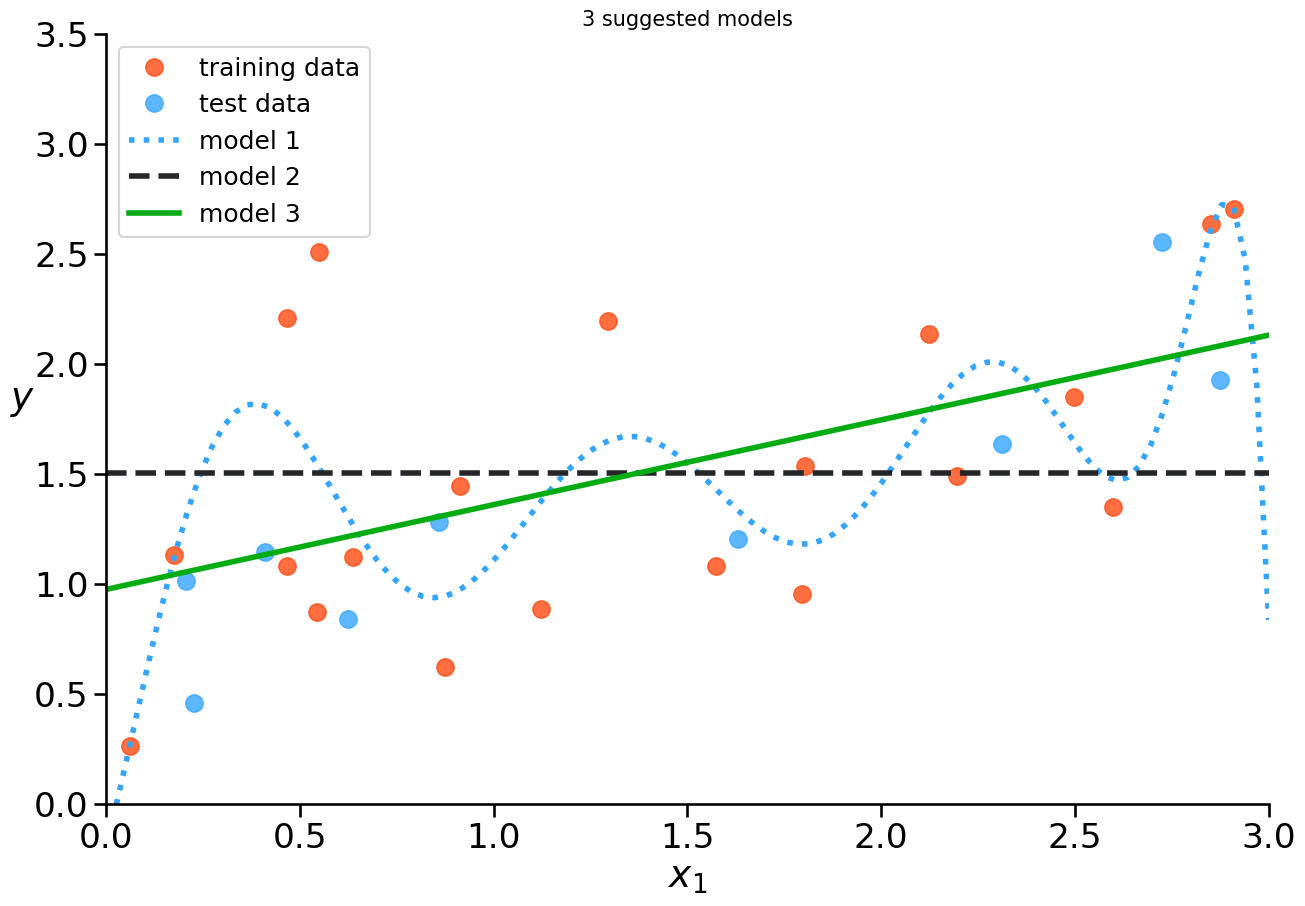

In [9]:
plot_models([Lasso, Lasso, Lasso], polynomials=[True,True,False], alphas=(0, 1, 0),data="both", title="3 suggested models", legend=[ "training data","test data","model 1", "model 2", "model 3"])


Notes: best model might be the orange one grey might be underfitting: actually its saying x1 has no effect on y. so for any x value it would predict the mean of y → it might not get the the underlying pattern at all blue might be overfitting. It is clear to see that the line is chasing each point esp the extreme ones. → it might not generalize well on unseen data to evaluate, you need a COST function and TEST data.

### Example: Underfitting vs. Overfitting
  
How to figure out if your model is overfitting?  
 
 - error on training data is low
 - error on test data is high



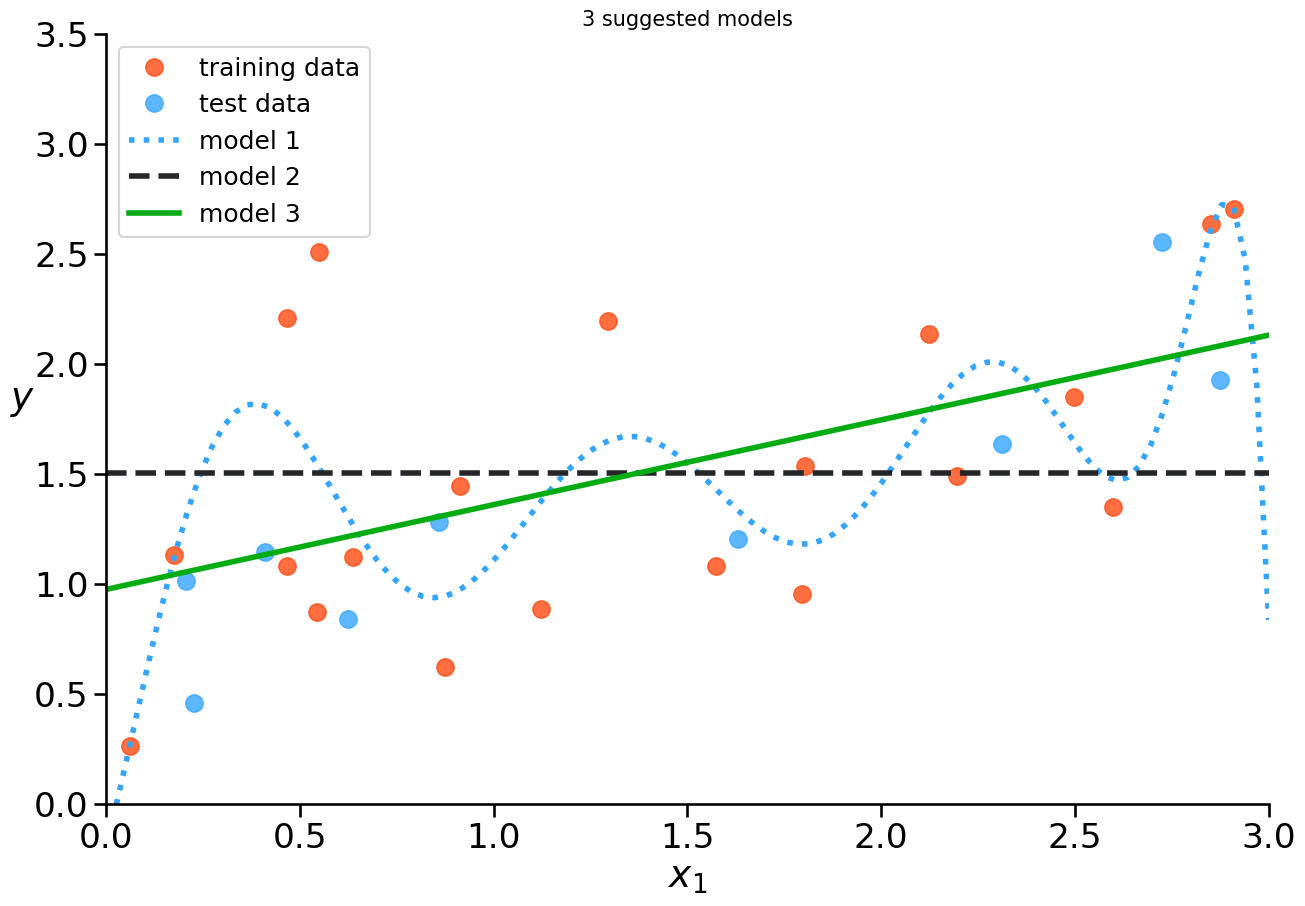

In [10]:
plot_models([Lasso, Lasso, Lasso], polynomials=[True,True,False], alphas=(0, 1, 0),data="both", title="3 suggested models", legend=[ "training data","test data","model 1", "model 2", "model 3"])


Notes: best model might be the orange one grey might be underfitting: actually its saying x1 has no effect on y. so for any x value it would predict the mean of y → it might not get the the underlying pattern at all blue might be overfitting. It is clear to see that the line is chasing each point esp the extreme ones. → it might not generalize well on unseen data to evaluate, you need a COST function and TEST data.

## Part 2
## A Visual Approach


### Prevent Overfitting

If we see overfitting of our model, we could gather more data.



### Prevent Overfitting

            
If we see overfitting of our model, we could reduce its complexity.  
      
HOW?      



<div class="alert alert-block alert-info">
<b>Note: </b> 
   Every model type has a way to reduce model
complexity.</br>
   We just learnt Linear Reg. that’s why we will
concentrate on the Regularization of those models for now.
</div>  

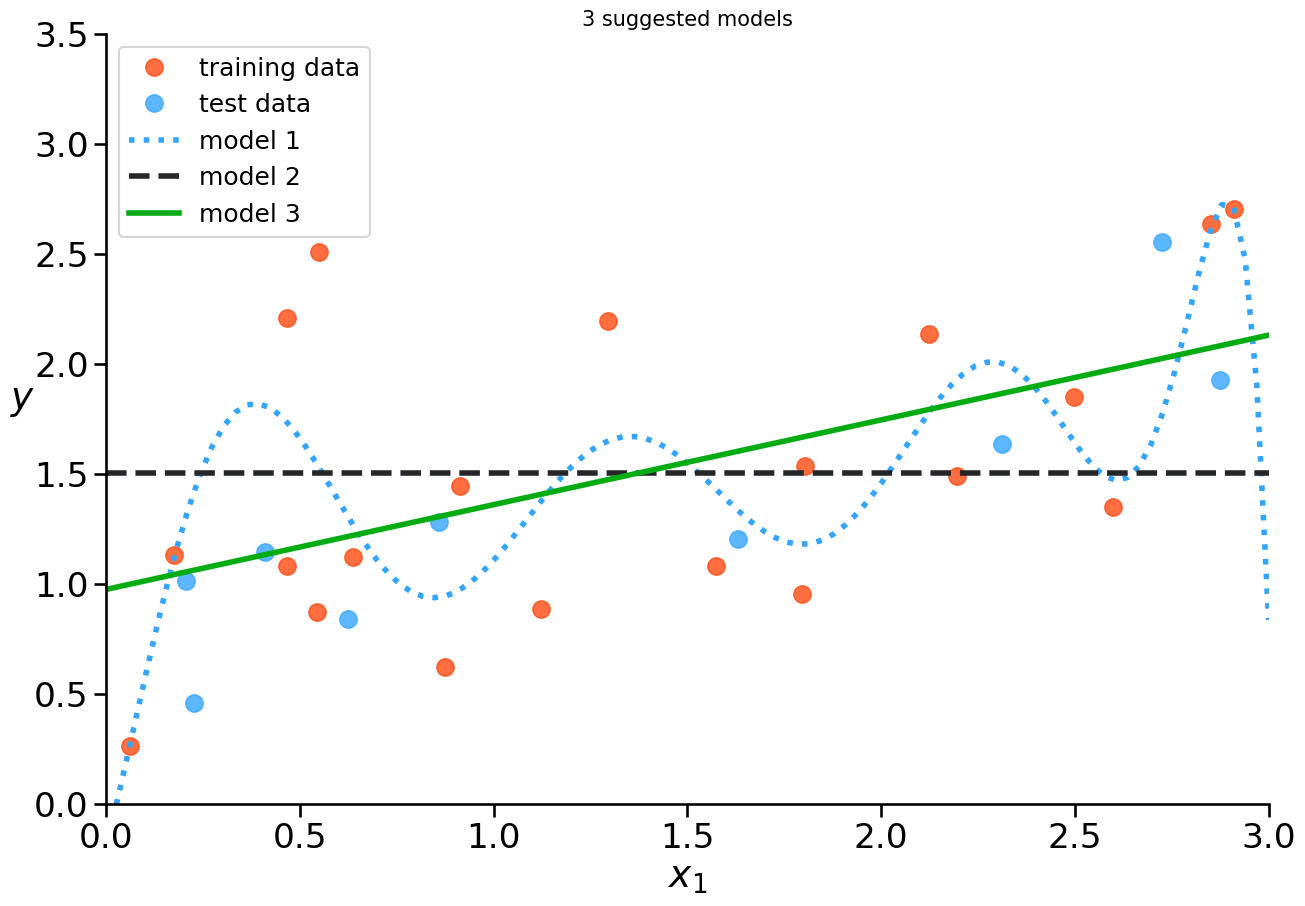

In [11]:
plot_models([Lasso, Lasso, Lasso], polynomials=[True,True,False], alphas=(0, 1, 0),data="both", title="3 suggested models", legend=[ "training data","test data","model 1", "model 2", "model 3"])


### Prevent Overfitting

If we see overfitting of our model, we could reduce its complexity.  

HOW?
- reduce amount of features


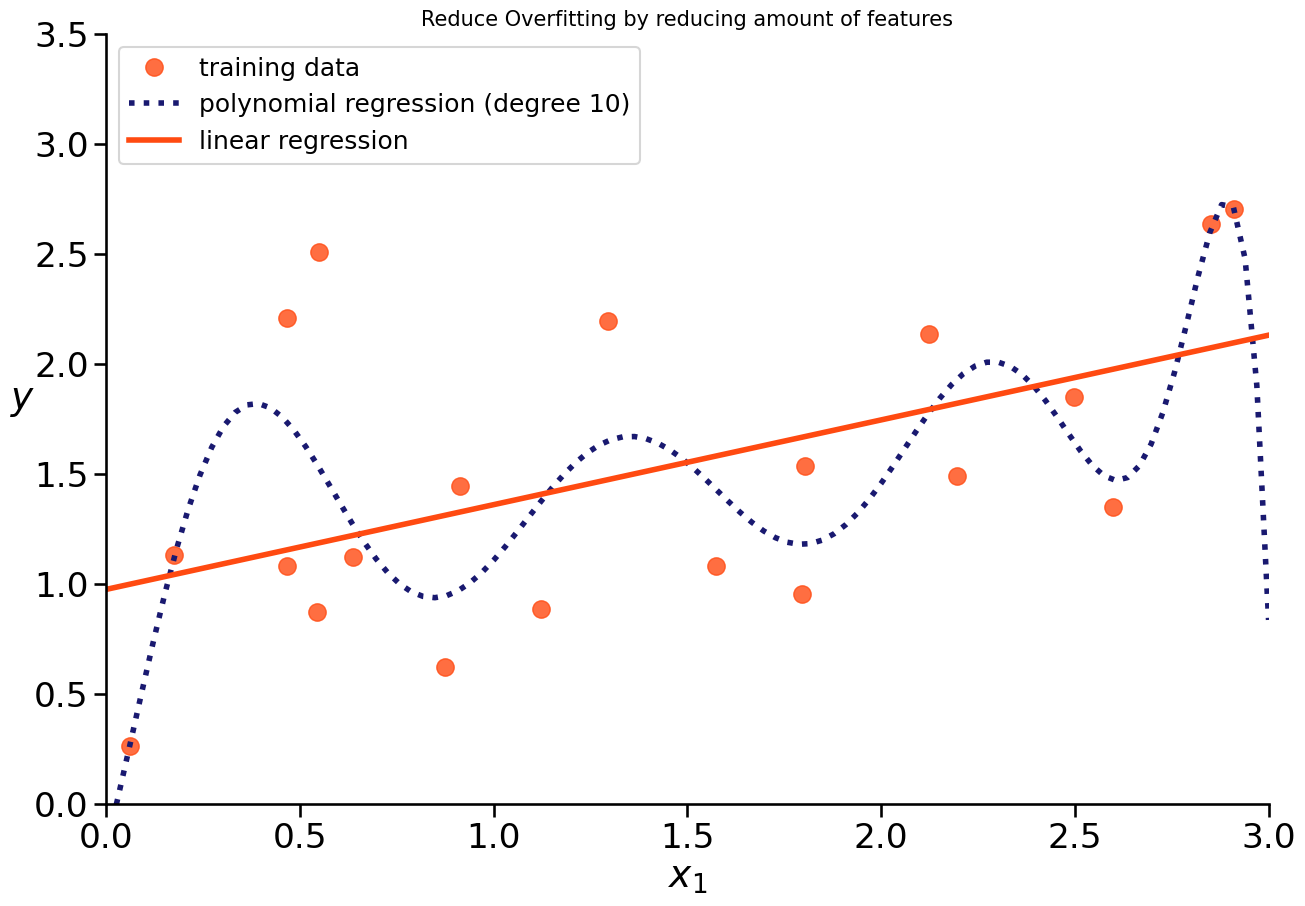

In [12]:
plot_models([Lasso, Lasso], polynomials=[True,False], alphas=(0, 0),markers=(":", "-"),colors=('#191970',  "#ff4a11"),title="Reduce Overfitting by reducing amount of features",legend=["training data", "polynomial regression (degree 10)", "linear regression"])



### Prevent Overfitting

If we see overfitting of our model, we could reduce its complexity.  

HOW?
 - reduce amount of features
 - make the model less susceptible to data by reducing the influence of features  
   → smaller coefficients



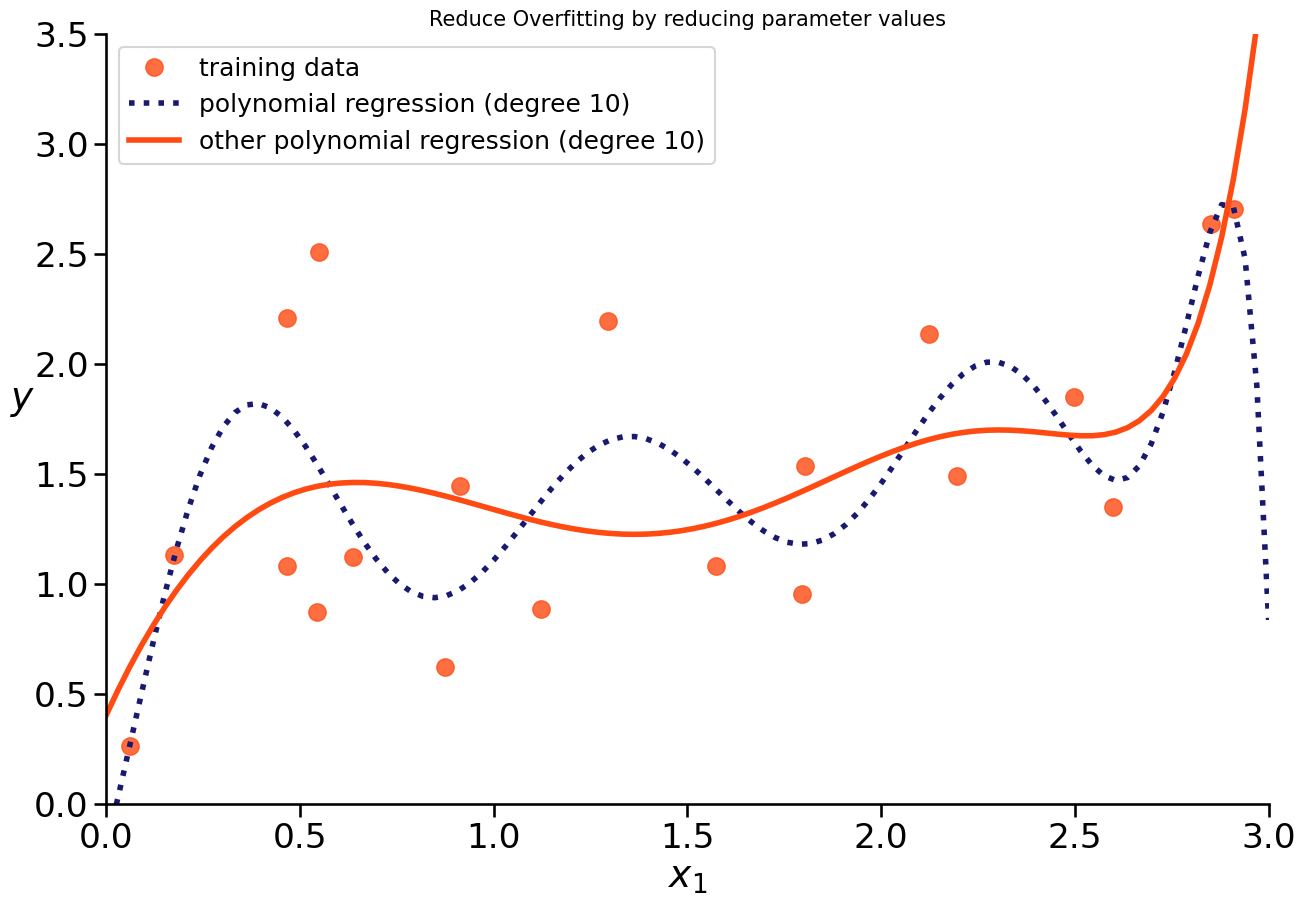

In [14]:
plot_models([Lasso, Ridge], polynomials=[True,True], alphas=(0, 0.0005),markers=(":", "-"),colors=('#191970',  "#ff4a11"),title="Reduce Overfitting by reducing parameter values", legend=["training data", "polynomial regression (degree 10)", "other polynomial regression (degree 10)"])


### Prevent Overfitting with Regularization
BOTH can be achieved with regularizing a model:
- reduce amount of features
- make the model less susceptive of data by reducing the influence of features (smaller coefficients)


## Part 3
## Regularization


### Regularization

Regularization conceptually uses a hard constraint to prevent coefficients from getting too large, at a small cost in overall accuracy. With the aim to get models that generalize better on new data.


<div class="alert alert-block alert-info">
<b>Note: </b> 
    Even with linear models, it can be useful to regularise them.
Because they have a tendency to trace outliers in the
training data.
</div>     


### Hard constraint


We add a hard constraint to our cost function:

$$\mathrm{min}\,J(b_{0},b_{1})={\frac{1}{n}}\sum{(y_{i}-b_{0}-b_{1}x_{i})}^{2}\,\text{subject}\,\text{to}\,-1 \leq b_{1} \leq 1$$

General form of the constraint: 

$$-t \leq b_{1} \leq t$$

What do we have to change to get to a form like this:

$$b_{1} \leq t$$

<div class="group">
<div class="text"> 
    <div class="alert alert-block alert-info">
<b>Note: </b> 
    We are not constraining the y-intercept
</div> 
</div>
<div class="images">
<img src="../images/regularization/img_p18_1.png">
</div>    
</div>


Q: How to change the formular so we can just look at the positive number t? </br>
A: square or absolute value

### Hard constraint

We add a hard constraint to our cost function:

$$\mathrm{min}\,J(b_{0},b_{1},...,b_{m})={\frac{1}{n}}\sum{(y_{i}-b_{0}-b_{1}x_{i}-...-b_{m}x_{m})}^{2}\,\text{subject}\,\text{to}\,L1/L2\,\text{constraint}$$

<div class="group">
  <div class="text"> 

The most common regularization constraints:

$$\begin{align}
L_{1}\,&:\,|b_{1}| \leq t \\
L_{2}\,&:\,b_{1}^2 \leq t
\end{align}$$      

</div>
    <div class="images">
        <img src="../images/regularization/img_p18_1.png">
    </div>
</div>



### Hard constraint with more features

We add a hard constraint to our cost function:

$$\mathrm{min}\,J(b_{0},b_{1},...,b_{m})=\frac{1}{n}\sum{(y_{i}-b_{0}-b_{1}x_{i}-...-b_{m}x_{m})}^{2}\,\text{subject}\,\text{to}\,L1/L2\,\text{constraint}$$

The most common regularization constraints:

$$\begin{align}
L_{1}\,&:\,|b_{1}|+|b_{2}|+... \leq t \\
L_{2}\,&:\,b_{1}^2+b_{2}^2+... \leq t
\end{align}$$

<div class="alert alert-block alert-info">
<b>Note: </b> 
    If we have more than one feature, we need to bring them all to the same scale. Otherwise they contribute different to the penalty term.
</div> 




Notes: We can add this constraint directly to our Loss function through the magic of Lagrange
multipliers... (see next slide)

### Soft constraint

<div class="group">
  <div class="text">  

We can add this constraint directly to our Loss function (t becomes alpha (or lambda))

$$\begin{align}
Ridge (L2): J(b)&=\frac{1}{n}\sum{\big(y-(b_{0}+b_{1}x_{1}+b_{2}x_{2})\big)}^{2} + \alpha\,(b_{1}^2+b_{2}^2) \\
Lasso (L1): J(b)&=\frac{1}{n}\sum{\big(y-(b_{0}+b_{1}x_{1}+b_{2}x_{2})\big)}^{2} + \alpha\,(|b_{1}|+|b_{2}|)
\end{align}$$

Alpha is a hyperparameter. Before training the model we need to set it.

</div>
    <div class="images">
        <img src="../images/regularization/img_p21_1.png">
        <img src="../images/regularization/img_p21_2.png">
    </div>
</div>

Notes: What happens if we set lambda to 0 ? The penalty turn disappears and we get the original loss function. What happens if we set it very high? That means that only coefficients very close to (0,0) will be suitable because the ordinary loss function bowl has effectively been pulled very close to (0,0). Regularization conceptually uses a hard constraint to prevent coefficients from getting too large. For implementation purposes, however, we convert that “subject to” hard constraint to a soft constraint by adding the constraint as a term to the loss function The penalty term is a soft constraint because there is no threshold or clipping; larger coefficients are simply more expensive. More info on Lagrange Multipliers: Wikipedia: In mathematical optimization, the method of Lagrange multipliers is a strategy for finding the local maxima and minima of a function subject to equality constraints (i.e., subject to the condition that one or more equations have to be satisfied exactly by the chosen values of the variables). nice video on khan academy: https://www.youtube.com/watch?v=yuqB-d5MjZA


Previsous sentence on the slide: We can add this constraint directly to our Loss function through the magic of Lagrange multipliers (t becomes alpha (or lambda))

### Soft constraint
    
We can add this constraint directly to our Loss function (t becomes alpha (or lambda))

$$\begin{align}
Ridge (L2): J(b)&=\frac{1}{n}\sum{\big(y-(b_{0}+b_{1}x_{1}+b_{2}x_{2})\big)}^{2} + \alpha\,(b_{1}^2+b_{2}^2) \\
Lasso (L1): J(b)&=\frac{1}{n}\sum{\big(y-(b_{0}+b_{1}x_{1}+b_{2}x_{2})\big)}^{2} + \alpha\,(|b_{1}|+|b_{2}|)
\end{align}$$


What happens if we set alpha to 0?  
What happens if we set alpha to a very high value?



Notes: What happens if we set lambda to 0 ? The penalty turn disappears and we get the original loss function. What happens if we set it very high? That means that only coefficients very close to (0,0) will be suitable because the ordinary loss function bowl has effectively been pulled very close to (0,0). Regularization conceptually uses a hard constraint to prevent coefficients from getting too large. For implementation purposes, however, we convert that “subject to” hard constraint to a soft constraint by adding the constraint as a term to the loss function The penalty term is a soft constraint because there is no threshold or clipping; larger coefficients are simply more expensive. More info on Lagrange Multipliers: Wikipedia: In mathematical optimization, the method of Lagrange multipliers is a strategy for finding the local maxima and minima of a function subject to equality constraints (i.e., subject to the condition that one or more equations have to be satisfied exactly by the chosen values of the variables). nice video on khan academy: https://www.youtube.com/watch?v=yuqB-d5MjZA

### Sklearn code for regularization

check sklearn documentation [here](9https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html)

```
ridge_mod = Ridge(alpha=1.0)  #adjust the alpha level
ridge_mod.fit(X, y)
ridge_mod.predict(X)

```

### Some different alpha values

We have to test some values for alpha and check which give us best
results on unseen data

In [15]:
print(f'the MSE for Ridge regularization and alpha = 0.5 is:', get_mse(Ridge,X,y, polynomial=True, alpha=0.5))
print(f'the MSE for Lasso regularization and alpha = 0.5 is: ',get_mse(Lasso,X,y, polynomial=True, alpha=0.5))


the MSE for Ridge regularization and alpha = 0.5 is: 0.29571689096317
the MSE for Lasso regularization and alpha = 0.5 is:  0.4647391677603675


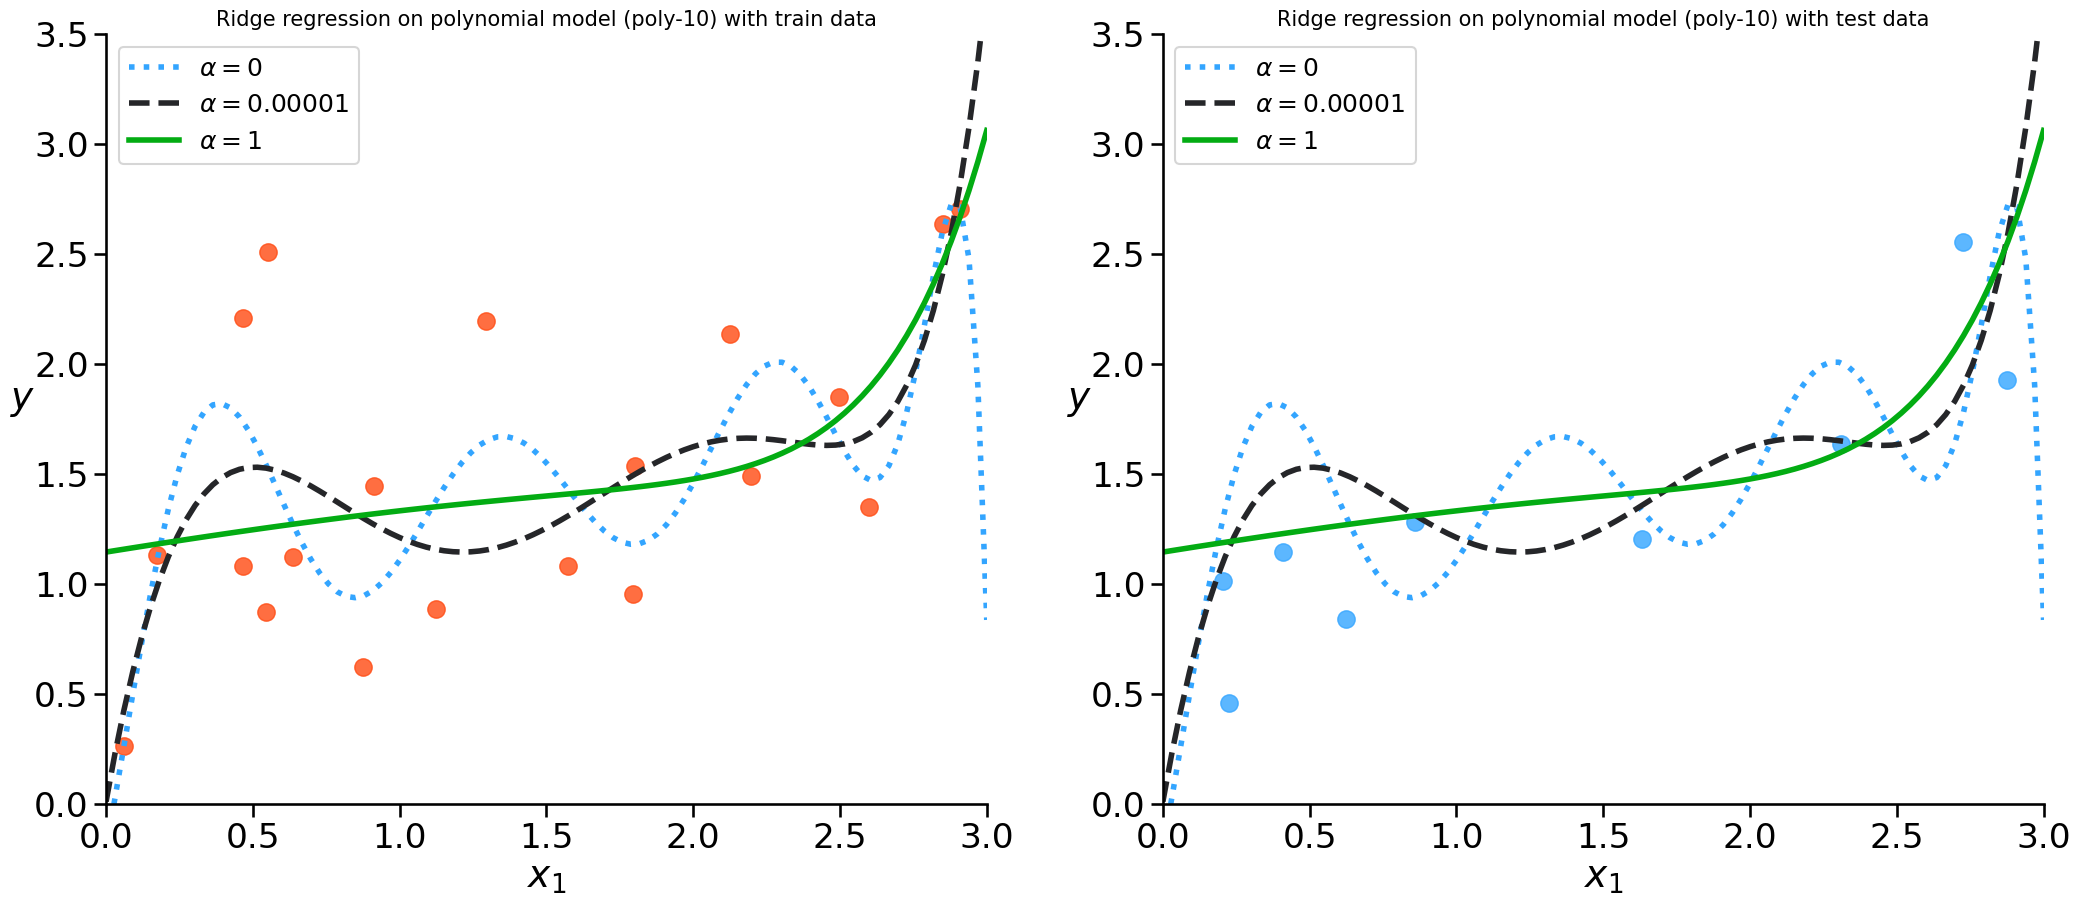

In [17]:
fig, ax = plt.subplots(1, 2, figsize=(25,10))
plot_model_type(Ridge, polynomial=True, alphas=(0, 10**-5, 1),  ax=ax[0],title="Ridge regression on polynomial model (poly-10) with train data")
plot_model_type(Ridge, polynomial=True, alphas=(0, 10**-5, 1),  ax=ax[1], data="test",title="Ridge regression on polynomial model (poly-10) with test data")

Notes: What happens if we set lambda to 0 ? The penalty turn disappears and we get the original loss function. What happens if we set it very high? That means that only coefficients very close to (0,0) will be suitable because the ordinary loss function bowl has effectively been pulled very close to (0,0). Regularization conceptually uses a hard constraint to prevent coefficients from getting too large. For implementation purposes, however, we convert that “subject to” hard constraint to a soft constraint by adding the constraint as a term to the loss function The penalty term is a soft constraint because there is no threshold or clipping; larger coefficients are simply more expensive. More info on Lagrange Multipliers: Wikipedia: In mathematical optimization, the method of Lagrange multipliers is a strategy for finding the local maxima and minima of a function subject to equality constraints (i.e., subject to the condition that one or more equations have to be satisfied exactly by the chosen values of the variables). nice video on khan academy: https://www.youtube.com/watch?v=yuqB-d5MjZA

### Ridge Regression

<div class="group">
  <div class="text">  
      
      
- Also called L2 Regularization / l2 norm 
- the regularization term forces the parameter estimates to be as small as possible
      - <b><span class="color-brand">weight decay</span></b>

$$J(b)=\frac{1}{n} \sum{(y-\hat{y}(b))^2}+\alpha\sum{b_{i}^2}$$  
    
</div>
    <div class="images">
        <img src="../images/regularization/img_p24_1.png">
    </div>
</div>



### Lasso Regression
<div class="group">
  <div class="text">  
      
Least Absolute Shrinkage and Selection Operator

- Also called L1 Regression / l1 norm
- Tends to <b><span class="color-brand">eliminate weights</b></span> = it automatically performs <b><span class="color-brand">feature selection</b></span>

$$J(b)=\frac{1}{n} \sum{(y-\hat{y}(b))^2}+\alpha\sum{|b_{i}|}$$
</div>
    <div class="images">
        <img src="../images/regularization/img_p25_1.png">
    </div>
</div>



### Ridge vs Lasso




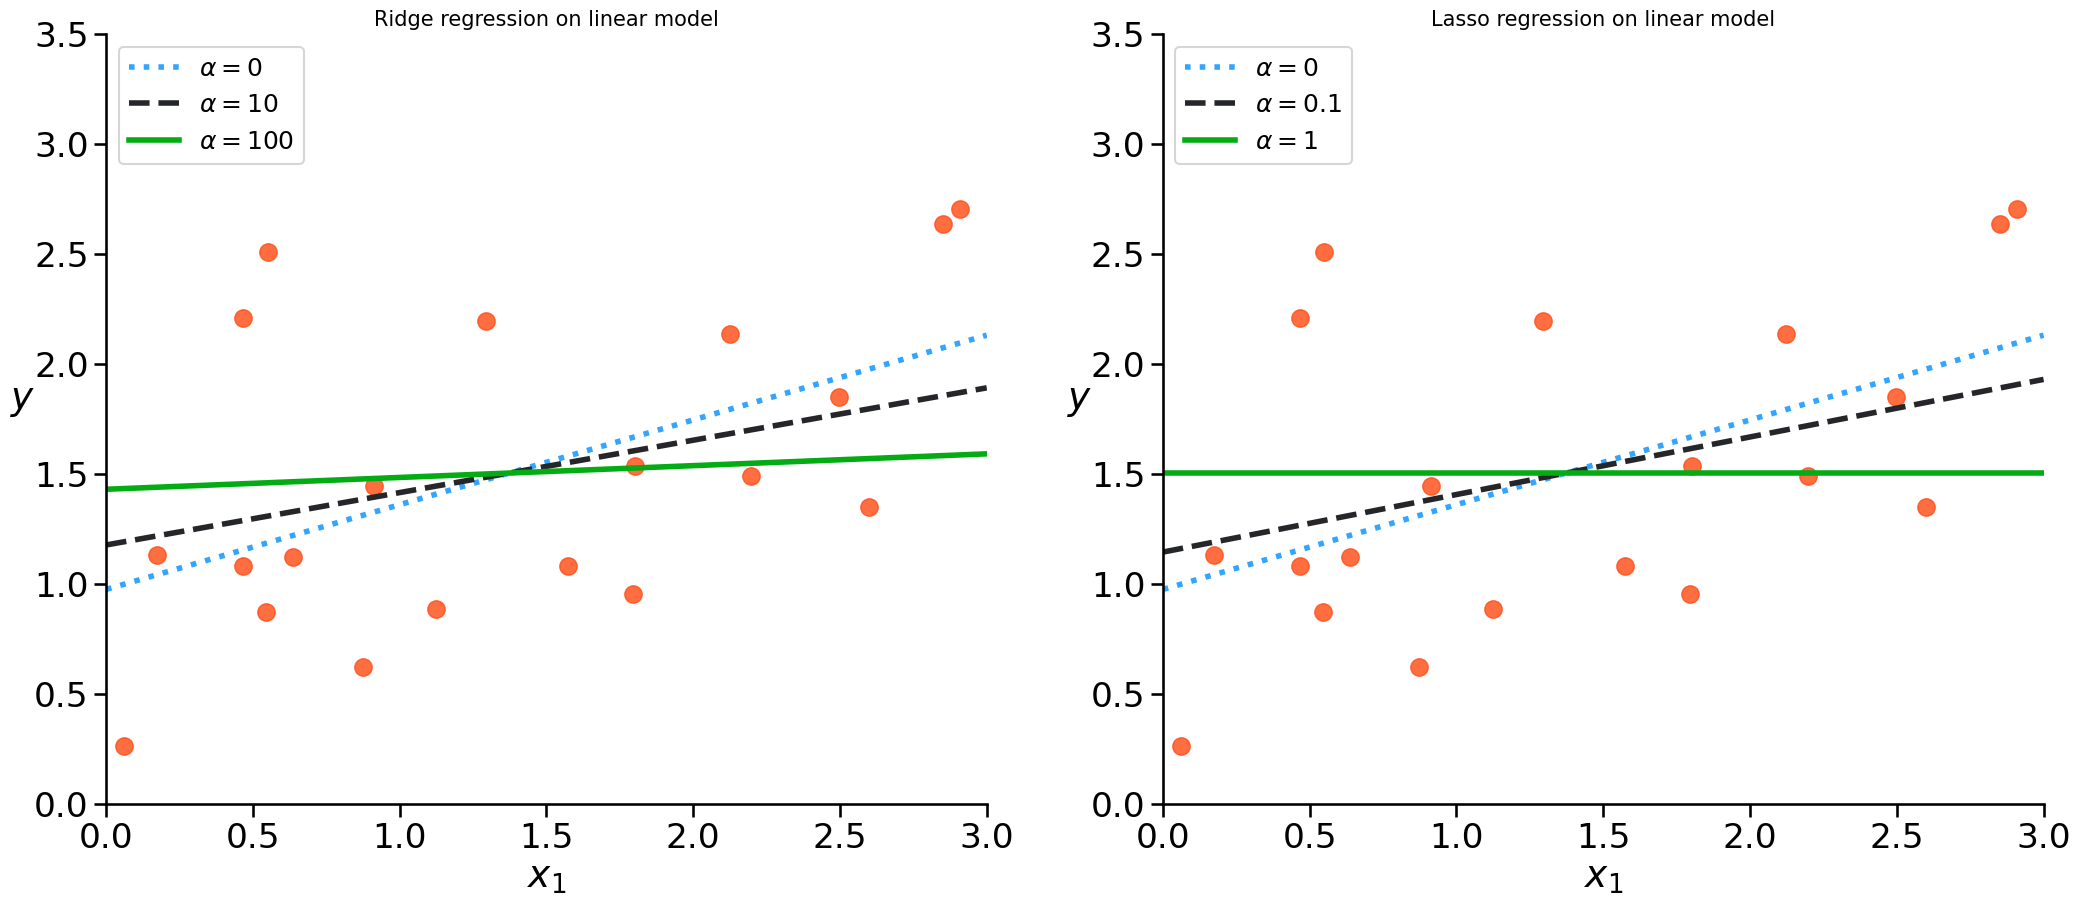

In [18]:
fig, ax = plt.subplots(1, 2, figsize=(25,10))
plot_model_type(Ridge, polynomial=False, alphas=(0, 10,100),  ax=ax[0],title="Ridge regression on linear model")
plot_model_type(Lasso, polynomial=False, alphas=(0, 0.1, 1),  ax=ax[1],title="Lasso regression on linear model")

Notes: high values of alpha: ridge: weight decay, lasso: weight elimination


### Why is L1 eliminating while L2 only reducing weights?

<center>
    <img src="../images/regularization/regularization.gif" width=800>
</center>



### Elastic Net - Mixing Lasso and Ridge
- Regularization term is weighted average of Ridge and Lasso Regularization term
- When r = 0 it is equivalent to Ridge, if r = 1 it is equivalent to Lasso Regression
- Preferable to Lasso when features are highly correlated or to Ridge for high-dimensional data (more features than observations)

$$J(b)=\frac{1}{n}\sum{(y-\hat{y}(b))}^{2}+\alpha\,r \sum{|b_{i}|+\alpha\,(1-r)} \sum{b_{i}^2}$$


$r$ = l1-ratio


### Comparison of regularization methods

<div class="group">
  <div class="text"> 
      
      
- elastic net is between L1 and L2 (whatever you use as r... it will change its form more to L2 or L1

    </div>
    <div class="images">
        <img src="../images/regularization/img_p29_1.png">
    </div>
</div>


$r$ is a value between 0 and 1 </br>
the higher r the closer the yellow line will get to lasso </br>
the lower r the closer the yellow line will get to ridge

### References


      
- Hands-on ML with scikit-learn and TensorFlow, Geron
- http://scott.fortmann-roe.com/docs/BiasVariance.html
- https://medium.com/analytics-vidhya/bias-variance-tradeoff-for-dummies-9f13147ab7d0
- Machine Learning - A probabilistic Perspective - Kevin P. Murphy
- https://explained.ai/regularization/constraints.html
- https://explained.ai/statspeak/index.html
- https://people.eecs.berkeley.edu/~jrs/189s21/


<div class="group">
  <div class="text">   
<img src="../images/regularization/img_p30_1.png">
    </div>
      <div class="images">
    </div>
</div>